In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv(r"/content/drive/MyDrive/ProjectCdac/house_prices.csv")

In [57]:
pd.set_option('display.max_rows', None)#This line sets that all rows will be shown regardless of how many there are.

pd.set_option('display.max_columns', None)#This line sets that all rows will be shown regardless of how many there are

In [58]:
df.shape

(187531, 21)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [60]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [61]:
# check for missing values
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


In [62]:
total_rows = df.shape[0]
column_names = ['Title',
    'Description',
    'Amount(in rupees)',
    'Price (in rupees)',
    'location',
    'Carpet Area',
    'Status',
    'Floor',
    'Transaction',
    'Furnishing',
    'facing',
    'overlooking',
    'Society',
    'Bathroom',
    'Balcony',
    'Car Parking',
    'Ownership',
    'Super Area',
    'Dimensions',
    'Plot Area'
]

print(column_names)

['Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


In [63]:
for col in column_names:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        percentage_null = (null_count / total_rows) * 100
        print(f"Column '{col}': {null_count} nulls ({percentage_null:.2f}%)")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

Column 'Title': 0 nulls (0.00%)
Column 'Description': 3023 nulls (1.61%)
Column 'Amount(in rupees)': 0 nulls (0.00%)
Column 'Price (in rupees)': 17665 nulls (9.42%)
Column 'location': 0 nulls (0.00%)
Column 'Carpet Area': 80673 nulls (43.02%)
Column 'Status': 615 nulls (0.33%)
Column 'Floor': 7077 nulls (3.77%)
Column 'Transaction': 83 nulls (0.04%)
Column 'Furnishing': 2897 nulls (1.54%)
Column 'facing': 70233 nulls (37.45%)
Column 'overlooking': 81436 nulls (43.43%)
Column 'Society': 109678 nulls (58.49%)
Column 'Bathroom': 828 nulls (0.44%)
Column 'Balcony': 48935 nulls (26.09%)
Column 'Car Parking': 103357 nulls (55.11%)
Column 'Ownership': 65517 nulls (34.94%)
Column 'Super Area': 107685 nulls (57.42%)
Column 'Dimensions': 187531 nulls (100.00%)
Column 'Plot Area': 187531 nulls (100.00%)


In [64]:
df.drop(["Dimensions","Plot Area"],axis=1,inplace=True)

In [65]:
df.drop(["Description"],axis=1,inplace=True)

In [66]:
df['Amount(in rupees)'].value_counts()

,count
Amount(in rupees),
Call for Price,9684
85 Lac,5264
65 Lac,4229
60 Lac,3869
70 Lac,3801
35 Lac,3369
75 Lac,3144
90 Lac,3143
40 Lac,3098


In [67]:
df = df[df['Amount(in rupees)'] != 'Call for Price']
df.shape

(177847, 18)

In [68]:
def treat_price(x):
    if isinstance(x, float) or isinstance(x, int):
        return round(x, 2)
    else:
        if x[1] == 'Cr':
            return round(float(x[0]) * 100, 2)  # Convert Cr to Lac
        elif x[1] == 'Lac':
            return round(float(x[0]), 2)        # Already in Lac
        else:
            return None  # Unknown unit


In [69]:
df['Final Amount'] = df['Amount(in rupees)'].str.split(' ').apply(treat_price)

In [70]:
df.drop(["Amount(in rupees)"],axis=1,inplace=True)

In [71]:
import re

# Using a lambda function directly with .apply()
df['BHK'] = df['Title'].apply(lambda title: int(re.search(r'(\d+)\s*BHK', title, re.IGNORECASE).group(1))
                                            if re.search(r'(\d+)\s*BHK', title, re.IGNORECASE) else None)

df.head()

,Index,Title,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Final Amount,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,42.0,1.0
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,98.0,2.0
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,140.0,2.0
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,25.0,1.0
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,160.0,2.0


In [72]:
  # Function to extract text based on splitting
def extract_text_after_keyword(title):
    # Prioritize 'in' as it usually precedes a more specific location/society
    if ' in ' in title:
        parts = title.split(' in ', 1) # Split only on the first ' in '
        return parts[1].strip() if len(parts) > 1 else None
    elif ' sale ' in title:
        parts = title.split(' sale ', 1) # Split only on the first ' sale '
        return parts[1].strip() if len(parts) > 1 else None
    else:
        return None # No 'in' or 'sale' found as a specific delimiter

In [73]:
# Apply the function using lambda (though a defined function is clearer here)
df['Society'] = df['Title'].apply(lambda title: extract_text_after_keyword(title))

In [74]:
df["location"].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [75]:
# Select the top 25 locations from your dataset

location_cnt=df['location'].value_counts()

In [76]:
location_top25=location_cnt[0:25]

In [77]:
location_top25.index

Index(['new-delhi', 'bangalore', 'kolkata', 'gurgaon', 'ahmedabad',
       'hyderabad', 'chennai', 'jaipur', 'greater-noida', 'faridabad',
       'vadodara', 'surat', 'pune', 'thane', 'mumbai', 'visakhapatnam',
       'mohali', 'zirakpur', 'chandigarh', 'noida', 'goa', 'ranchi', 'bhiwadi',
       'kochi', 'dehradun'],
      dtype='object', name='location')

In [78]:
df=df[df['location'].isin(location_top25.index)]

In [79]:
df["Transaction"].unique()

array(['Resale', 'New Property', nan, 'Other', 'Rent/Lease'], dtype=object)

In [80]:
df = df[df['Transaction'] != 'Rent/Lease']
df = df[df['Transaction'] != 'Other']
df.shape

(160934, 19)

In [81]:
df.shape

(160934, 19)

In [82]:
df.isnull().sum()

,0
Index,0
Title,0
Price (in rupees),6267
location,0
Carpet Area,68672
Status,521
Floor,6197
Transaction,55
Furnishing,1695
facing,56945


In [83]:
df.drop(["Index"],axis=1,inplace=True)

In [84]:
for col in column_names:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        percentage_null = (null_count / total_rows) * 100
        print(f"Column '{col}': {null_count} nulls ({percentage_null:.2f}%)")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

Column 'Title': 0 nulls (0.00%)
Column 'Price (in rupees)': 6267 nulls (3.34%)
Column 'location': 0 nulls (0.00%)
Column 'Carpet Area': 68672 nulls (36.62%)
Column 'Status': 521 nulls (0.28%)
Column 'Floor': 6197 nulls (3.30%)
Column 'Transaction': 55 nulls (0.03%)
Column 'Furnishing': 1695 nulls (0.90%)
Column 'facing': 56945 nulls (30.37%)
Column 'overlooking': 66315 nulls (35.36%)
Column 'Society': 0 nulls (0.00%)
Column 'Bathroom': 579 nulls (0.31%)
Column 'Balcony': 40971 nulls (21.85%)
Column 'Car Parking': 83857 nulls (44.72%)
Column 'Ownership': 53633 nulls (28.60%)
Column 'Super Area': 92312 nulls (49.22%)


###Univarate Analysis


<Axes: xlabel='location'>

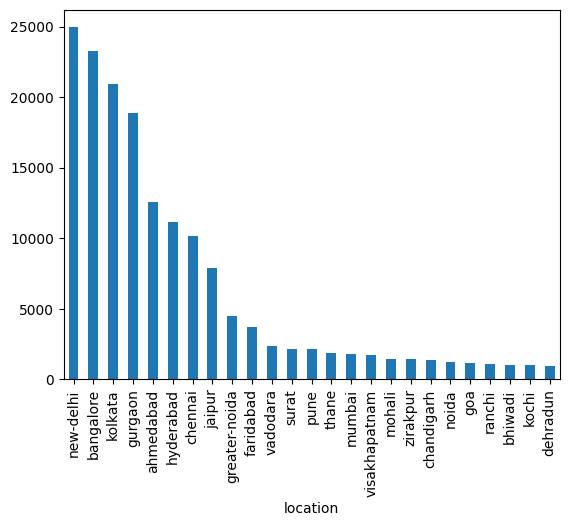

In [85]:
df['location'].value_counts().plot(kind='bar',)

In [86]:
#Observations
# data is catagorised arround diff city mostly in new delhi , Banglore and less in faridabad
#No missing values

In [87]:
df['Final Amount'].isnull().sum()

np.int64(0)

In [88]:
df['Final Amount'].describe()

,Final Amount
count,160934.000000
mean,124.890884
std,376.375973
min,1.800000
25%,51.000000
50%,83.000000
75%,155.000000
max,140030.000000


<Axes: xlabel='Final Amount', ylabel='Count'>

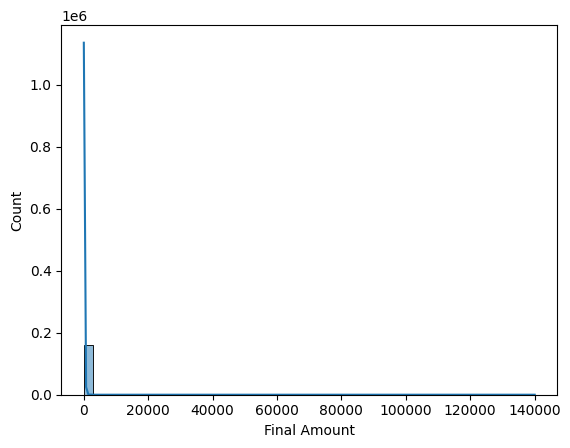

In [89]:
sns.histplot(df['Final Amount'], kde=True, bins=50)

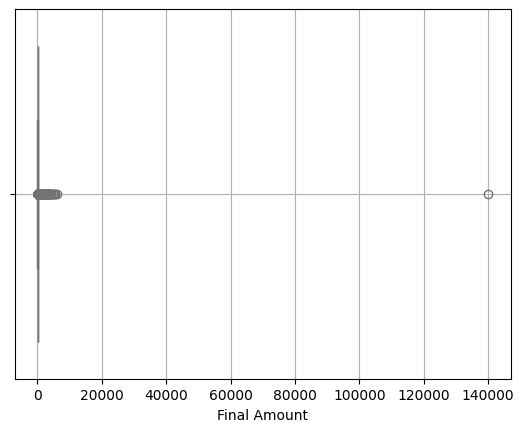

In [90]:
sns.boxplot(x=df['Final Amount'], color='lightgreen')
plt.grid()

In [91]:
# Skewness and Kurtosis
skewness = df['Final Amount'].skew()
kurtosis = df['Final Amount'].kurt()

print(skewness,kurtosis)

319.5452130901107 118636.41327980193


In [92]:
# Quantile Analysis
quantiles = df['Final Amount'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

,Final Amount
0.01,16.5
0.05,23.0
0.95,350.0
0.99,700.0


In [93]:
# Identify potential outliers using IQR method
Q1 = df['Final Amount'].describe()['25%']
Q3 = df['Final Amount'].describe()['75%']
IQR = Q3 - Q1

IQR
# this code didnt work

np.float64(104.0)

In [94]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-105.0 311.0


In [95]:
outliers = df[(df['Final Amount'] < lower_bound) | (df['Final Amount'] > upper_bound)]
outliers.shape

(9238, 18)

In [96]:
outliers['Final Amount'].describe()

,Final Amount
count,9238.000000
mean,546.763044
std,1483.309400
min,312.000000
25%,395.000000
50%,430.000000
75%,600.000000
max,140030.000000


In [97]:
df = df[(df['Final Amount'] >= lower_bound) & (df['Final Amount'] <= upper_bound)]
df.shape

(151696, 18)

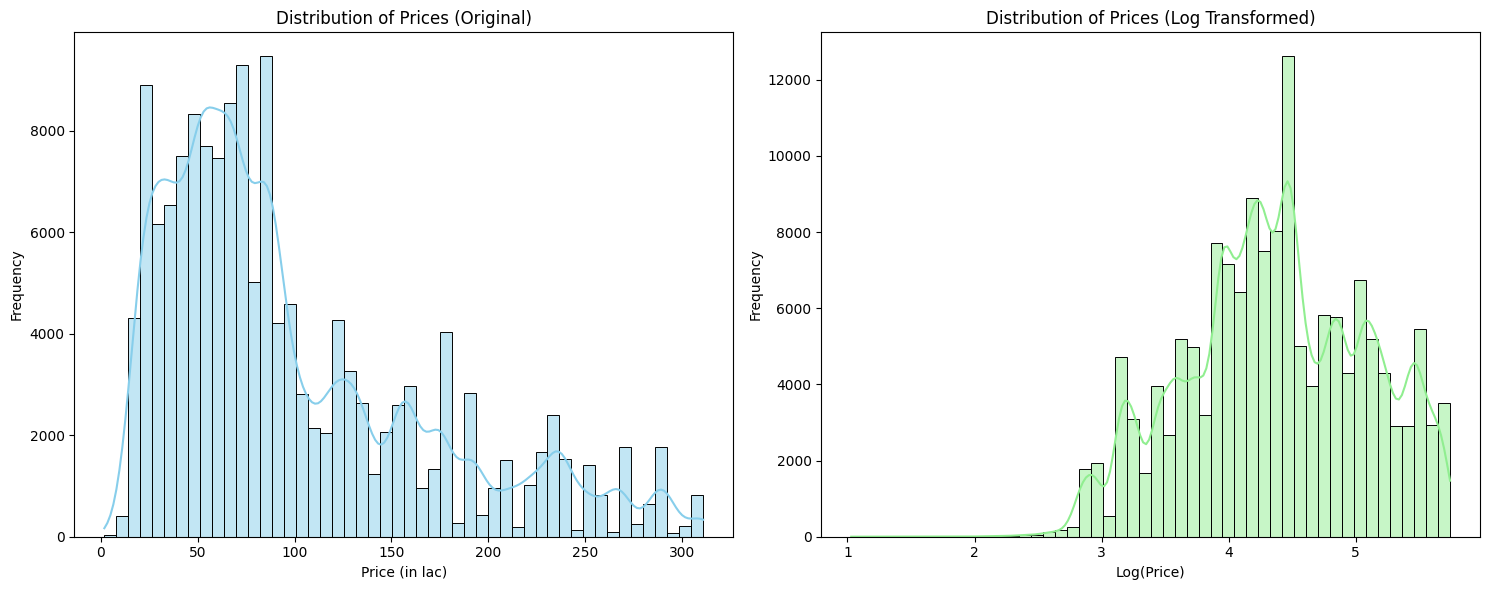

In [98]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Final Amount'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in lac)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Final Amount']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [99]:
skewness = np.log1p(df['Final Amount']).skew()
kurtosis = np.log1p(df['Final Amount']).kurt()

print(skewness,kurtosis)

-0.1121672938132006 -0.6026317017628142


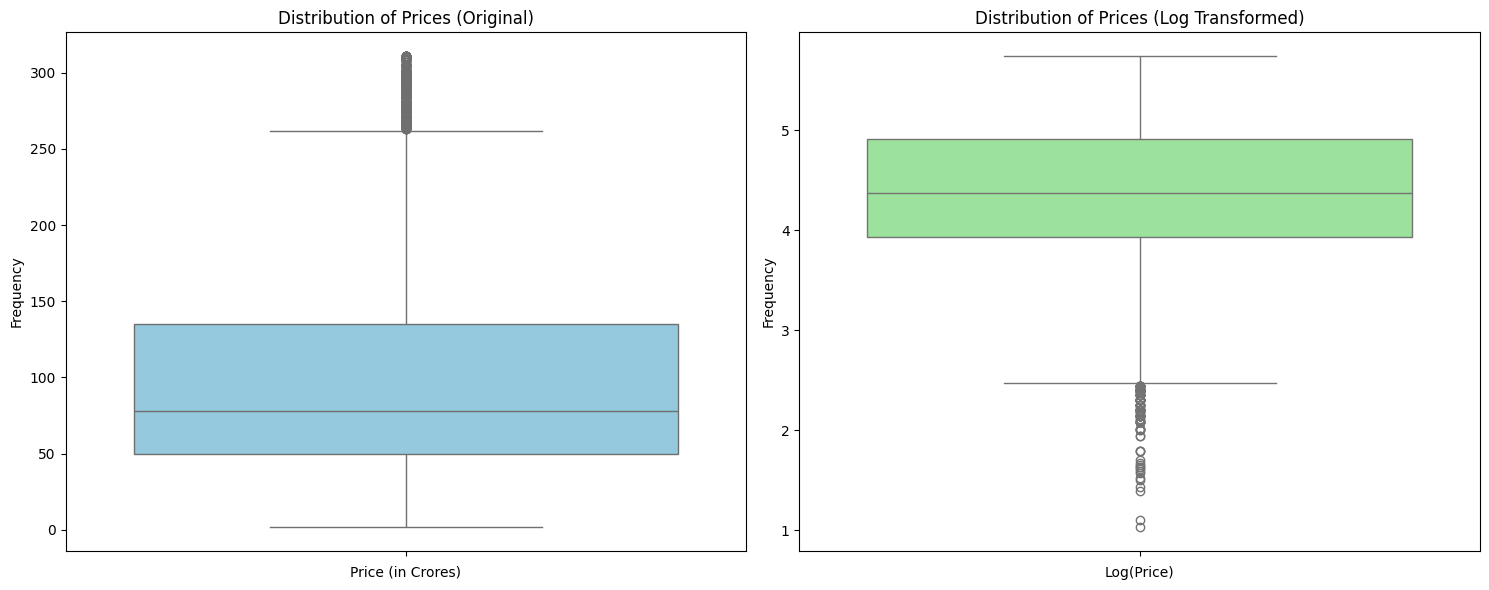

In [100]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['Final Amount'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['Final Amount']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [101]:
df['Price (in rupees)'].isnull().sum()

np.int64(5204)

In [102]:
df['Price (in rupees)'].describe()

,Price (in rupees)
count,146492.000000
mean,7011.066488
std,3696.570397
min,0.000000
25%,4373.750000
50%,6034.000000
75%,8636.000000
max,133929.000000


<Axes: xlabel='Price (in rupees)', ylabel='Count'>

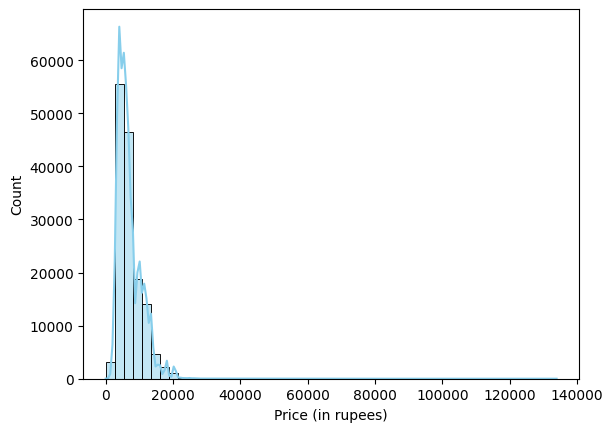

In [103]:
sns.histplot(df['Price (in rupees)'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='Price (in rupees)'>

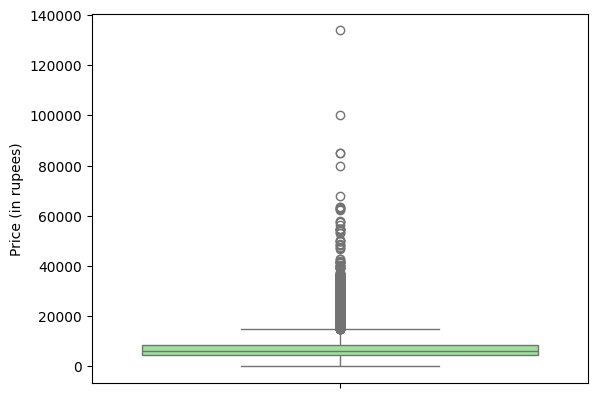

In [104]:
sns.boxplot(df['Price (in rupees)'], color='lightgreen')

In [105]:
df['BHK'].isnull().sum()

np.int64(236)

<Axes: xlabel='BHK'>

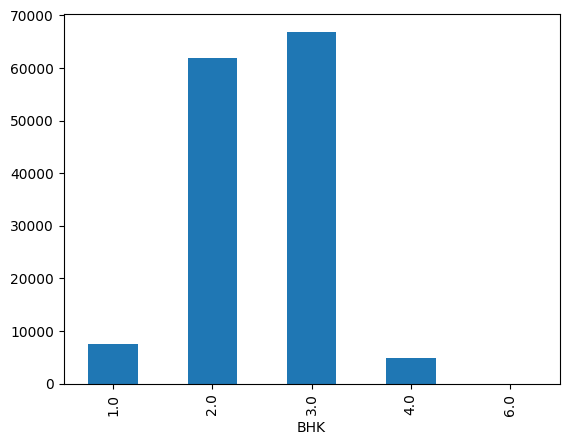

In [217]:
df['BHK'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

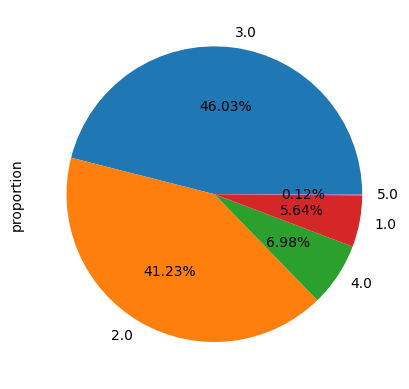

In [106]:
df['BHK'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [107]:
df['Bathroom'].isnull().sum()

np.int64(568)

<Axes: xlabel='Bathroom'>

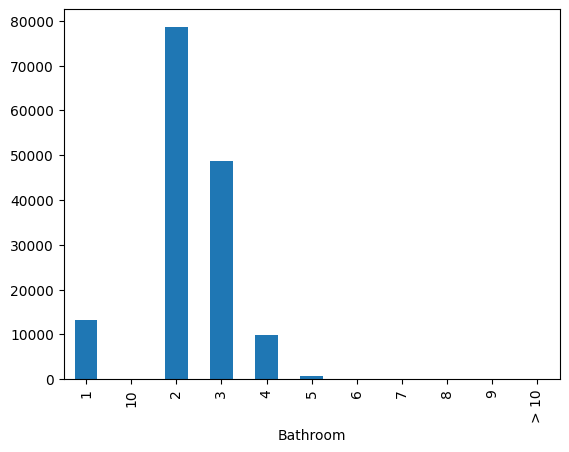

In [108]:
df['Bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

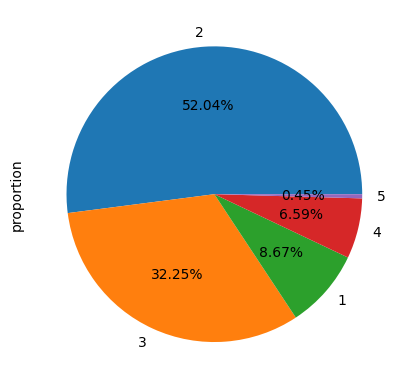

In [109]:
df['Bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [110]:
df['Balcony'].isnull().sum()

np.int64(40006)

<Axes: xlabel='Balcony'>

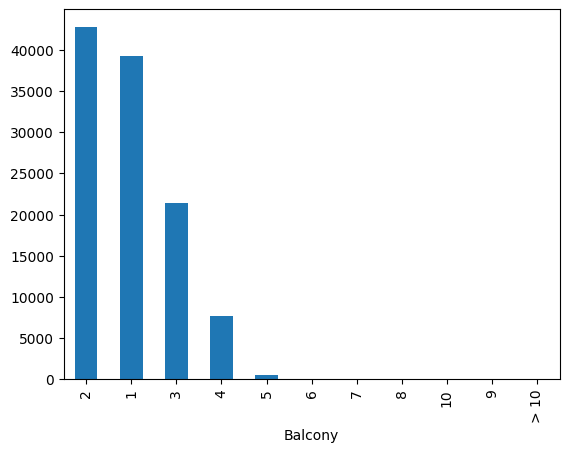

In [111]:
df['Balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

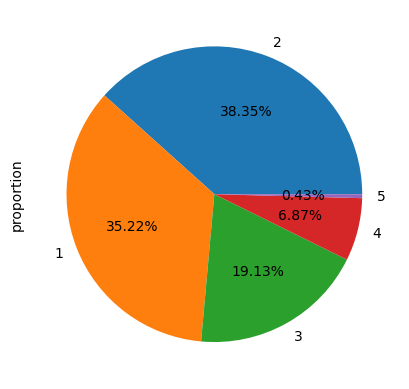

In [112]:
df['Balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [113]:
df['facing'].isnull().sum()

np.int64(55985)

In [114]:
df['facing'].fillna('NA',inplace=True)

In [115]:
df['facing'].value_counts()

,count
facing,
NA,55985
East,44402
North - East,20159
North,12372
West,7218
South,3920
North - West,3467
South - East,2295
South -West,1878


<Axes: xlabel='facing'>

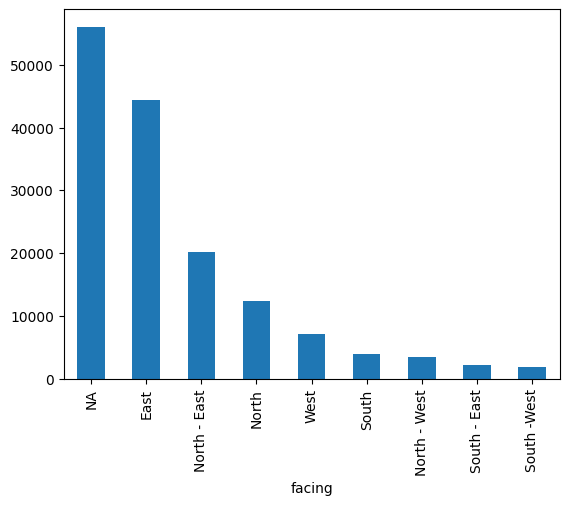

In [116]:
df['facing'].value_counts().plot(kind='bar')

In [117]:
df.head()

,Title,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Final Amount,BHK
0,1 BHK Ready to Occupy Flat for sale in Srushti...,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NA,NaN,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,NaN,NaN,NaN,42.0,1.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar Pokhran Road,2,NaN,1 Open,Freehold,NaN,98.0,2.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru Kolshet Road,2,NaN,1 Covered,Freehold,NaN,140.0,2.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NA,NaN,Kasheli,1,1,NaN,NaN,NaN,25.0,1.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty Pokhran Road,2,NaN,1 Covered,Co-operative Society,NaN,160.0,2.0


In [118]:
df.describe()

,Price (in rupees),Final Amount,BHK
count,146492.000000,151696.000000,151460.000000
mean,7011.066488,99.199666,2.548587
std,3696.570397,69.371073,0.717681
min,0.000000,1.800000,1.000000
25%,4373.750000,50.000000,2.000000
50%,6034.000000,78.000000,3.000000
75%,8636.000000,135.000000,3.000000
max,133929.000000,311.000000,10.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151696 entries, 0 to 187530
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title              151696 non-null  object 
 1   Price (in rupees)  146492 non-null  float64
 2   location           151696 non-null  object 
 3   Carpet Area        85038 non-null   object 
 4   Status             151180 non-null  object 
 5   Floor              145964 non-null  object 
 6   Transaction        151642 non-null  object 
 7   Furnishing         150039 non-null  object 
 8   facing             151696 non-null  object 
 9   overlooking        86807 non-null   object 
 10  Society            151696 non-null  object 
 11  Bathroom           151128 non-null  object 
 12  Balcony            111690 non-null  object 
 13  Car Parking        68900 non-null   object 
 14  Ownership          98601 non-null   object 
 15  Super Area         66609 non-null   object 
 16  Final A

In [120]:
df = df.drop(columns=['Title','overlooking'])

In [121]:
df['Carpet Area'].isnull().sum()

np.int64(66658)

In [122]:
df['Carpet Area'].describe()

,Carpet Area
count,85038
unique,2258
top,1000 sqft
freq,4900


In [123]:
# rename columns
df.rename(columns={'Carpet Area':'Carpet Area in sqft'},inplace=True)

In [124]:
df['Carpet Area in sqft'] = df['Carpet Area in sqft'].apply(lambda x:
    int(re.search(r'(\d+)', str(x)).group(1)) # Extract digits and convert to int
    if pd.notna(x) and re.search(r'(\d+)', str(x)) # Check if not NaN and digits exist
    else np.nan # If NaN or no digits found, set to NaN
)


<Axes: xlabel='Carpet Area in sqft', ylabel='Count'>

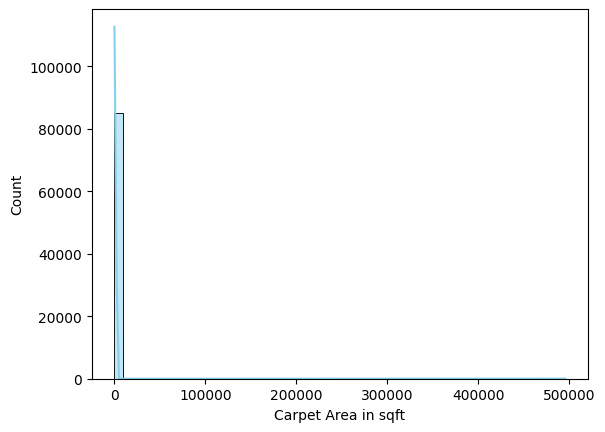

In [125]:
sns.histplot(df['Carpet Area in sqft'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='Carpet Area in sqft'>

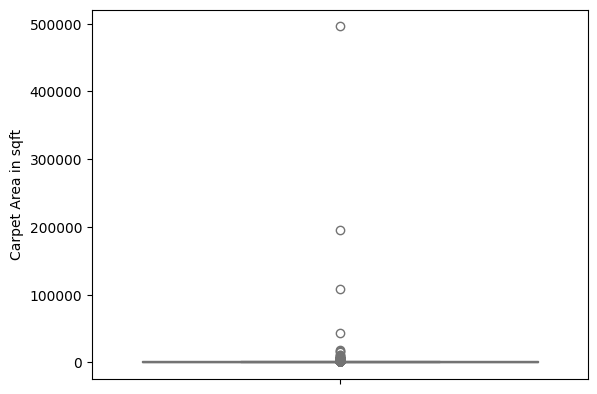

In [126]:
sns.boxplot(df['Carpet Area in sqft'].dropna(), color='lightgreen')

In [127]:
df['Carpet Area in sqft'].describe()

,Carpet Area in sqft
count,85038.000000
mean,1100.934747
std,1944.839749
min,1.000000
25%,750.000000
50%,1000.000000
75%,1435.000000
max,495970.000000


In [128]:
df.head(25)

,Price (in rupees),location,Carpet Area in sqft,Status,Floor,Transaction,Furnishing,facing,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Final Amount,BHK
0,6000.0,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,NA,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,NaN,NaN,NaN,42.0,1.0
1,13799.0,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Dosti Vihar Pokhran Road,2,NaN,1 Open,Freehold,NaN,98.0,2.0
2,17500.0,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Sunrise by Kalpataru Kolshet Road,2,NaN,1 Covered,Freehold,NaN,140.0,2.0
3,NaN,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,NA,Kasheli,1,1,NaN,NaN,NaN,25.0,1.0
4,18824.0,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,TenX Habitat Raymond Realty Pokhran Road,2,NaN,1 Covered,Co-operative Society,NaN,160.0,2.0
5,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,Unfurnished,East,Virat Aangan Titwala,1,1,NaN,Co-operative Society,680 sqft,45.0,1.0
6,2538.0,thane,550.0,Ready to Move,4 out of 5,Resale,Unfurnished,NA,Mumbra,1,NaN,NaN,NaN,NaN,16.5,1.0
7,10435.0,thane,NaN,Ready to Move,Ground out of 7,Resale,Furnished,NA,Kalwa,1,NaN,NaN,NaN,575 sqft,60.0,1.0
8,10000.0,thane,NaN,Ready to Move,Ground out of 2,Resale,Furnished,NA,Kalwa,1,NaN,NaN,Co-operative Society,600 sqft,60.0,1.0
9,11150.0,thane,900.0,Ready to Move,3 out of 27,Resale,Unfurnished,East,Pride Palms Kolshet,3,1,1 Covered,Freehold,NaN,160.0,3.0


In [129]:
def convert_to_sqft(x):
    """
    Converts carpet area to square feet.
    Handles 'sqft' and 'sqyrd' units.
    """
    # Handle NaN values
    if pd.isna(x):
        return np.nan

    x_str = str(x).lower()

    # Check for 'sqyrd' or 'sqyd'
    if 'sqyrd' in x_str or 'sqyd' in x_str:
        match = re.search(r'(\d+)', x_str)
        if match:
            # Convert to int and then multiply by 9 (1 sq yard = 9 sq feet)
            return int(match.group(1)) * 9
        else:
            return np.nan
    else:
        # Assume it's 'sqft' and extract the number
        match = re.search(r'(\d+)', x_str)
        if match:
            return int(match.group(1))
        else:
            return np.nan

# Apply the new function to the column
df['Super Areain sqft'] = df['Super Area'].apply(convert_to_sqft)

#correlation_AB = df['Super Area'].corr(df['Final Amount'])



In [130]:
#correlation_AB = df['Super Area'].corr(df['Final Amount'])

correlation_AB = df['Super Areain sqft'].corr(df['Final Amount'])
print(correlation_AB)

0.667535561044868


In [131]:

df['Super Areain sqft'].isnull().sum()

np.int64(85087)

In [132]:

df['Super Areain sqft'].describe()

,Super Areain sqft
count,66609.000000
mean,1342.515981
std,565.961053
min,4.000000
25%,1017.000000
50%,1300.000000
75%,1675.000000
max,8000.000000


<Axes: xlabel='Super Areain sqft', ylabel='Count'>

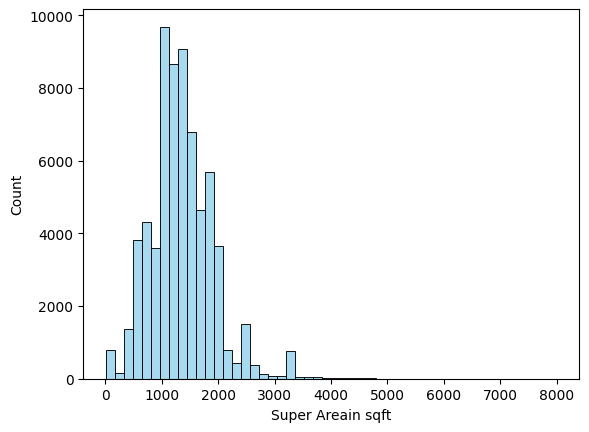

In [133]:
sns.histplot(df['Super Areain sqft'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='Super Areain sqft'>

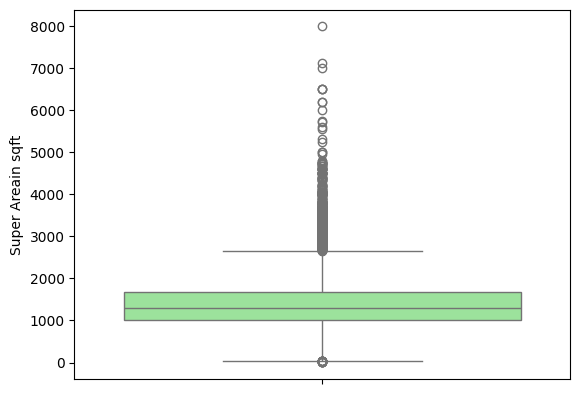

In [134]:
sns.boxplot(df['Super Areain sqft'].dropna(), color='lightgreen')

In [135]:
###Multivarent Analysis

<Axes: xlabel='Final Amount', ylabel='location'>

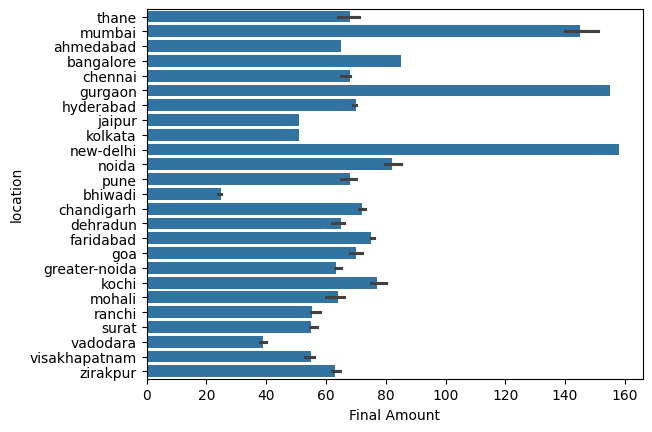

In [136]:
sns.barplot(x=df['Final Amount'], y=df['location'], estimator=np.median)

<Axes: xlabel='Final Amount', ylabel='Transaction'>

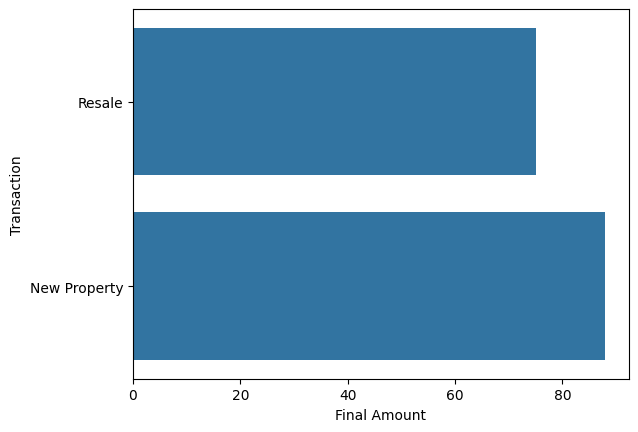

In [137]:
sns.barplot(x=df['Final Amount'], y=df['Transaction'], estimator=np.median)

<Axes: xlabel='Final Amount', ylabel='facing'>

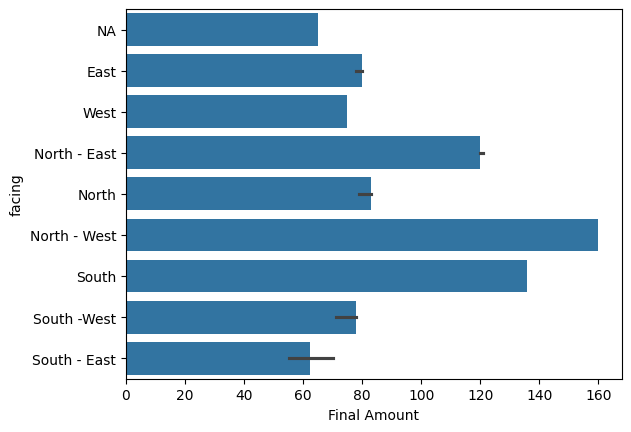

In [138]:
sns.barplot(x=df['Final Amount'], y=df['facing'], estimator=np.median)

<Axes: xlabel='Final Amount', ylabel='Ownership'>

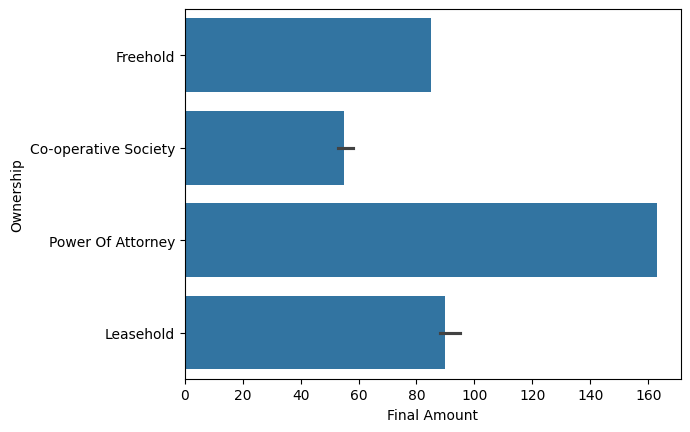

In [139]:
 sns.barplot(x=df['Final Amount'], y=df['Ownership'], estimator=np.median)

<Axes: xlabel='BHK', ylabel='Final Amount'>

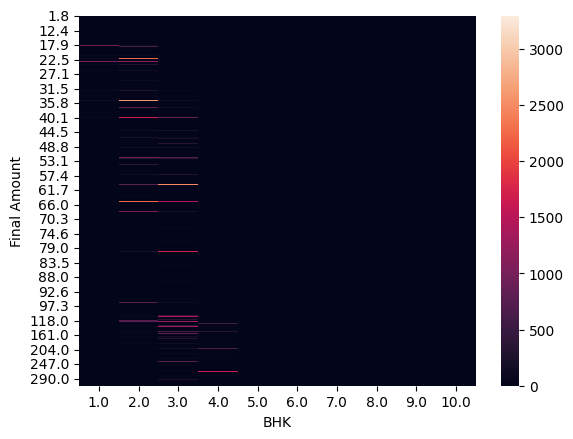

In [140]:
 sns.heatmap(pd.crosstab(df['Final Amount'],df['BHK']))

In [141]:
# checking outliers
df[df['BHK'] >= 10]

,Price (in rupees),location,Carpet Area in sqft,Status,Floor,Transaction,Furnishing,facing,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Final Amount,BHK,Super Areain sqft
16009,9686.0,bangalore,1337.0,Ready to Move,13 out of 18,New Property,Unfurnished,North - West,RMZ Galleria Allalasandra Yelahanka,3,1,2 Covered,Freehold,NaN,185.0,10.0,NaN
16200,4000.0,bangalore,NaN,Ready to Move,Ground out of 5,Resale,Furnished,South - East,Kasavanahalli,> 10,NaN,2 Covered,Freehold,6000 sqft,240.0,10.0,6000.0
17538,4308.0,bangalore,NaN,Ready to Move,Ground out of 5,Resale,Semi-Furnished,NA,Whitefield,> 10,NaN,NaN,NaN,6500 sqft,280.0,10.0,6500.0
39936,3717.0,chennai,5300.0,Ready to Move,1 out of 2,Resale,Unfurnished,East,Guduvancherry Own Project Madambakkam,10,4,4 Covered,Freehold,NaN,223.0,10.0,NaN
40728,2600.0,chennai,NaN,Ready to Move,Ground out of 3,Resale,Unfurnished,NA,Guduvancheri,10,NaN,NaN,NaN,5000 sqft,130.0,10.0,5000.0
42028,5000.0,chennai,5322.0,Ready to Move,Ground out of 2,Resale,Semi-Furnished,South - East,Ambattur,1,4,5 Covered,Freehold,NaN,270.0,10.0,NaN
84174,NaN,jaipur,NaN,Ready to Move,Lower Basement out of 5,Resale,Semi-Furnished,NA,Lalarpura,10,4,NaN,NaN,NaN,275.0,10.0,NaN
116987,13636.0,new-delhi,NaN,Ready to Move,5 out of 5,Resale,Semi-Furnished,NA,Dwarka Mor,> 10,4,NaN,NaN,2200 sqft,300.0,10.0,2200.0
117952,10000.0,new-delhi,NaN,Ready to Move,1 out of 3,Resale,Unfurnished,East,BK Dutt Colony,3,5,NaN,Freehold,3000 sqft,300.0,10.0,3000.0
160095,4884.0,goa,NaN,Ready to Move,3 out of 3,Resale,NaN,NA,Morjim,10,NaN,NaN,NaN,400 sqm,210.0,10.0,400.0


<Axes: xlabel='Final Amount', ylabel='BHK'>

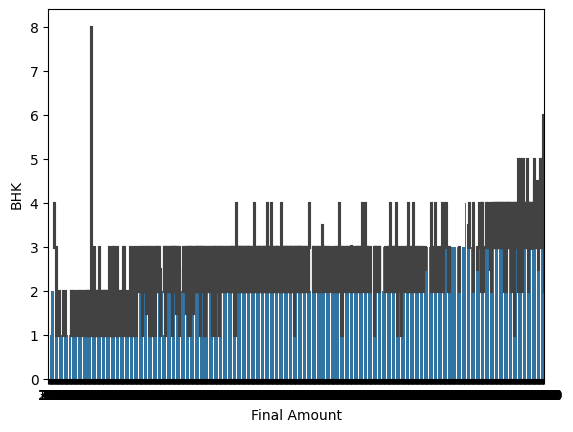

In [142]:
sns.barplot(x=df['Final Amount'], y=df['BHK'], estimator=np.median)

In [143]:
#### missing Value Imputation

In [144]:
df.shape

(151696, 17)

In [145]:
df = df.sort_values(by='Final Amount')

<Axes: xlabel='Carpet Area in sqft', ylabel='Final Amount'>

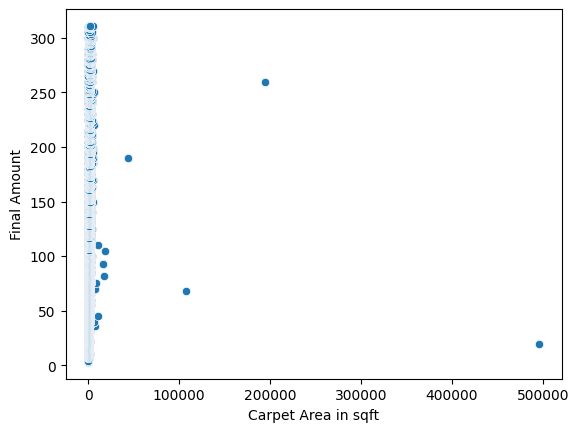

In [146]:
sns.scatterplot(x=df['Carpet Area in sqft'],y=df['Final Amount'])

<Axes: xlabel='Super Areain sqft', ylabel='Final Amount'>

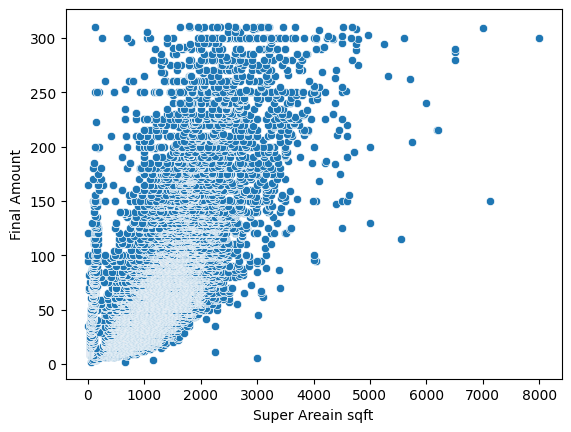

In [147]:
sns.scatterplot(x=df['Super Areain sqft'],y=df['Final Amount'])

In [148]:
#df['Carpet Area in sqft'] = df['Carpet Area in sqft'].interpolate(method='linear')
# df['Carpet Area in sqft'] = df.groupby('location')['Carpet Area in sqft'].transform(lambda x: x.interpolate(method='linear'))
df['Carpet Area in sqft'] = df.groupby('BHK')['Carpet Area in sqft'].transform(lambda x: x.fillna(x.median()))


In [149]:
#df['Super Area in sqft'] = df['Super Areain sqft'].interpolate(method='linear')
#
df['Super Area in sqft'] = df.groupby('BHK')['Super Areain sqft'].transform(lambda x: x.fillna(x.median()))


<Axes: xlabel='Carpet Area in sqft', ylabel='Final Amount'>

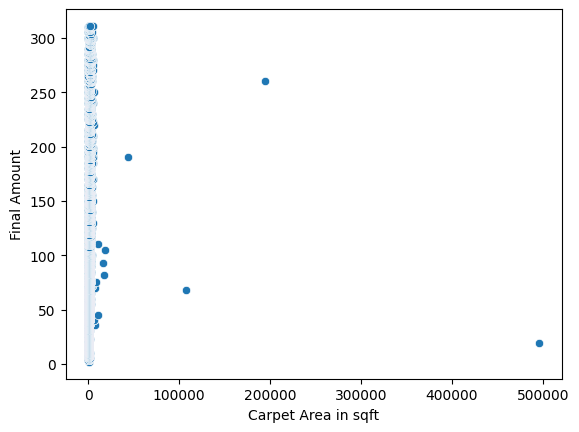

In [150]:
sns.scatterplot(x=df['Carpet Area in sqft'],y=df['Final Amount'])

<Axes: xlabel='Super Areain sqft', ylabel='Final Amount'>

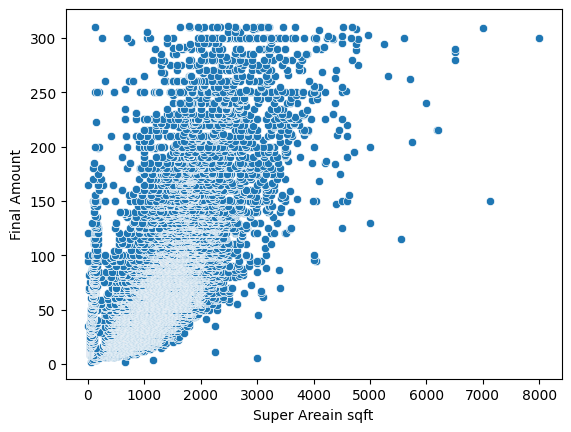

In [151]:
sns.scatterplot(x=df['Super Areain sqft'],y=df['Final Amount'])

In [152]:
correlation_AB = df['Carpet Area in sqft'].corr(df['Final Amount'])
print(correlation_AB)

0.1937419678754106


In [153]:
correlation_AB = df['Super Area in sqft'].corr(df['Final Amount'])
print(correlation_AB)

0.6133499443177256


In [154]:
df.isnull().sum()

,0
Price (in rupees),5204
location,0
Carpet Area in sqft,241
Status,516
Floor,5732
Transaction,54
Furnishing,1657
facing,0
Society,0
Bathroom,568


<Axes: xlabel='BHK', ylabel='Final Amount'>

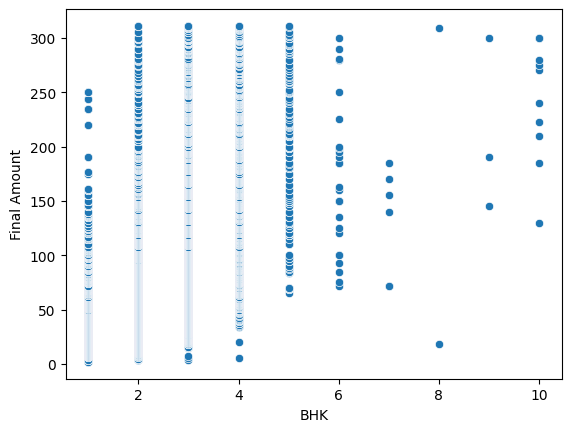

In [155]:
sns.scatterplot(x=df['BHK'],y=df['Final Amount'])

In [156]:
df.shape

(151696, 18)

In [157]:
mean = df['BHK'].mean()
df['BHK'] = df['BHK'].fillna(mean)

In [158]:
df.drop(["Super Area"],axis=1,inplace=True)

In [159]:
df.drop(["Car Parking"],axis=1,inplace=True)

In [160]:
#df['Price (in rupees)'] = df['Price (in rupees)'].interpolate(method='linear')
df['Price (in rupees)'] = df.groupby('location')['Price (in rupees)'].transform(lambda x: x.interpolate(method='linear'))


In [161]:
df['Transaction'].unique()


array(['Resale', 'New Property', nan], dtype=object)

In [162]:
lable_map = {"Transaction": {"Resale": 0,"New Property":1}}

df.replace(lable_map, inplace=True)

In [163]:
df['Transaction'].unique()

array([ 0.,  1., nan])

In [164]:
median = df['Transaction'].median()
df['Transaction'] = df['Transaction'].fillna(median)

In [165]:
df['Furnishing'].unique()

array(['Furnished', 'Unfurnished', nan, 'Semi-Furnished'], dtype=object)

In [166]:
lable_map = {"Furnishing": {"0": 0,"Unfurnished": 1,"Semi-Furnished": 2,"Furnished": 3}}

df.replace(lable_map, inplace=True)

In [167]:
median = df['Furnishing'].median()
df['Furnishing'] = df['Furnishing'].fillna(median)


In [168]:
df.isnull().sum()

,0
Price (in rupees),3
location,0
Carpet Area in sqft,241
Status,516
Floor,5732
Transaction,0
Furnishing,0
facing,0
Society,0
Bathroom,568


In [169]:
df['Status'].unique()

array(['Ready to Move', nan], dtype=object)

In [170]:
df['Status'] = df['Status'].fillna('0')

In [171]:
lable_map = {"Status": {"0": 0,"Ready to Move": 1,}}

df.replace(lable_map, inplace=True)

In [172]:
df.drop(["Floor"],axis=1,inplace=True)

In [173]:
df['facing'].unique()

array(['NA', 'North', 'East', 'South', 'West', 'South - East',
       'North - East', 'South -West', 'North - West'], dtype=object)

In [174]:
lable_map = {
    'East': 3,
    'West': 2,
    'North': 2,
    'South': 4,
    'North - East':5 ,
    'North - West': 5,
    'South - East': 0,
    'South -West': 1,
    'NA': 0
}
df.replace(lable_map, inplace=True)

In [175]:
df['facing'] = df['facing'].fillna('0')

In [176]:
df["Ownership"].unique()

array([nan, 'Freehold', 'Leasehold', 'Power Of Attorney',
       'Co-operative Society'], dtype=object)

In [177]:
lable_map = {"Ownership": {'Freehold': 0, 'Leasehold': 1, 'Power Of Attorney': 2, 'Co-operative Society': 3}}
df.replace(lable_map, inplace=True)

In [178]:
df["Ownership"].unique()

array([nan,  0.,  1.,  2.,  3.])

In [179]:
median = df['Ownership'].median()
df['Ownership'] = df['Ownership'].fillna(median)


In [180]:

df.shape

(151696, 15)

In [181]:
df['Bathroom'].unique()

array(['1', '3', '2', nan, '4', '8', '5', '7', '6', '10', '> 10', '9'],
      dtype=object)

In [182]:
lable_map = {"Bathroom": {"> 10": 11}}

df.replace(lable_map, inplace=True)

In [183]:
df['Bathroom'].isna().sum()

np.int64(568)

In [184]:

#df["Bathroom"].fillna(method='ffill', inplace=True)  # forward fill
df['Bathroom'] = df.groupby('BHK')['Bathroom'].transform(lambda x: x.fillna(method='ffill'))

In [185]:
df['Balcony'].unique()

array([nan, '1', '2', '3', '4', '> 10', '5', '7', '6', '10', '8', '9'],
      dtype=object)

In [186]:
lable_map = {"Balcony": {"> 10": 11}}

df.replace(lable_map, inplace=True)

In [187]:
df['Balcony'] = df.groupby('BHK')['Balcony'].transform(lambda x: x.fillna(method='ffill'))



In [188]:
df['Balcony'].unique()

array([nan, '1', '2', '3', '4', 11, '5', '7', '6', '10', '8', '9'],
      dtype=object)

In [189]:
lable_map = {
    '1': 0,
    '2': 1,
    '3': 2,
    '4': 3,
    '5':4 ,
    '6': 5,
    '7': 6,
    '8': 7,
    '9': 8,
    '10': 9,
    '11': 10

}
df.replace(lable_map, inplace=True)

In [190]:
df.isnull().sum()

,0
Price (in rupees),3
location,0
Carpet Area in sqft,241
Status,0
Transaction,0
Furnishing,0
facing,0
Society,0
Bathroom,0
Balcony,18


In [191]:

#df.dropna(inplace=True)
df.isnull().sum()

,0
Price (in rupees),3
location,0
Carpet Area in sqft,241
Status,0
Transaction,0
Furnishing,0
facing,0
Society,0
Bathroom,0
Balcony,18


In [192]:
df.shape

(151696, 15)

In [193]:
###Handling Outliers

<Axes: xlabel='Final Amount', ylabel='Density'>

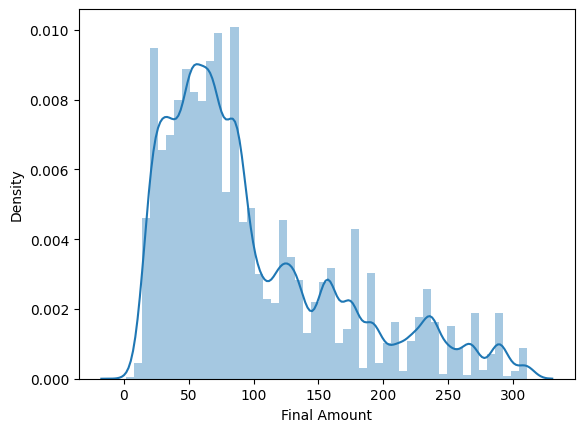

In [194]:
# outliers on the basis of price column
sns.distplot(df['Final Amount'])

<Axes: xlabel='Final Amount'>

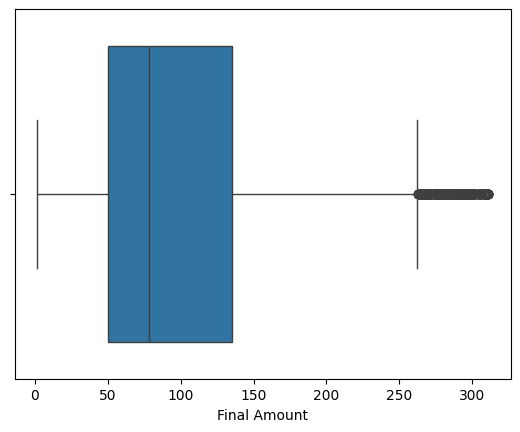

In [195]:
sns.boxplot(x=df['Final Amount'])

In [196]:
df.head()

,Price (in rupees),location,Carpet Area in sqft,Status,Transaction,Furnishing,facing,Society,Bathroom,Balcony,Ownership,Final Amount,BHK,Super Areain sqft,Super Area in sqft
178451,277.0,surat,400.0,1,0.0,3.0,0,bambroli twon Surat,0,NaN,0.0,1.8,1.000000,650.0,650.0
4406,3636.0,ahmedabad,400.0,1,0.0,3.0,0,Avkar hall Ahmedabad,0,0.0,0.0,2.0,1.000000,55.0,55.0
156353,1000.0,faridabad,NaN,1,0.0,1.0,2,Omaxe Heights Sector 86,0,0.0,0.0,3.0,2.548587,NaN,NaN
71214,279.0,hyderabad,1300.0,1,0.0,3.0,0,West Marredpally,2,NaN,0.0,3.2,3.000000,1145.0,1145.0
159703,4667.0,goa,400.0,1,0.0,2.0,0,Campal,1,0.0,0.0,3.5,1.000000,75.0,75.0


In [197]:
Q1 = df['Final Amount'].quantile(0.25)
Q3 = df['Final Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier rows
df = df[(df['Final Amount'] >= lower_bound) & (df['Final Amount'] <= upper_bound)].copy()



In [198]:

 df.shape

(146070, 15)

In [199]:
df.head()

,Price (in rupees),location,Carpet Area in sqft,Status,Transaction,Furnishing,facing,Society,Bathroom,Balcony,Ownership,Final Amount,BHK,Super Areain sqft,Super Area in sqft
178451,277.0,surat,400.0,1,0.0,3.0,0,bambroli twon Surat,0,NaN,0.0,1.8,1.000000,650.0,650.0
4406,3636.0,ahmedabad,400.0,1,0.0,3.0,0,Avkar hall Ahmedabad,0,0.0,0.0,2.0,1.000000,55.0,55.0
156353,1000.0,faridabad,NaN,1,0.0,1.0,2,Omaxe Heights Sector 86,0,0.0,0.0,3.0,2.548587,NaN,NaN
71214,279.0,hyderabad,1300.0,1,0.0,3.0,0,West Marredpally,2,NaN,0.0,3.2,3.000000,1145.0,1145.0
159703,4667.0,goa,400.0,1,0.0,2.0,0,Campal,1,0.0,0.0,3.5,1.000000,75.0,75.0


In [200]:
df.shape

(146070, 15)

In [201]:
Q1 = df['Carpet Area in sqft'].quantile(0.25)
Q3 = df['Carpet Area in sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier rows
df = df[(df['Carpet Area in sqft'] >= lower_bound) & (df['Carpet Area in sqft'] <= upper_bound)].copy()


In [202]:
df.shape

(144201, 15)

In [203]:
df.head()

,Price (in rupees),location,Carpet Area in sqft,Status,Transaction,Furnishing,facing,Society,Bathroom,Balcony,Ownership,Final Amount,BHK,Super Areain sqft,Super Area in sqft
178451,277.0,surat,400.0,1,0.0,3.0,0,bambroli twon Surat,0,NaN,0.0,1.8,1.0,650.0,650.0
4406,3636.0,ahmedabad,400.0,1,0.0,3.0,0,Avkar hall Ahmedabad,0,0.0,0.0,2.0,1.0,55.0,55.0
71214,279.0,hyderabad,1300.0,1,0.0,3.0,0,West Marredpally,2,NaN,0.0,3.2,3.0,1145.0,1145.0
159703,4667.0,goa,400.0,1,0.0,2.0,0,Campal,1,0.0,0.0,3.5,1.0,75.0,75.0
179593,2483.0,surat,145.0,1,0.0,2.0,0,Katar Gam,0,0.0,0.0,3.6,1.0,NaN,500.0


In [204]:
Q1 = df['Super Area in sqft'].quantile(0.25)
Q3 = df['Super Area in sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier rows
df = df[(df['Super Area in sqft'] >= lower_bound) & (df['Super Area in sqft'] <= upper_bound)].copy()


In [205]:
df.head()

,Price (in rupees),location,Carpet Area in sqft,Status,Transaction,Furnishing,facing,Society,Bathroom,Balcony,Ownership,Final Amount,BHK,Super Areain sqft,Super Area in sqft
178451,277.0,surat,400.0,1,0.0,3.0,0,bambroli twon Surat,0,NaN,0.0,1.8,1.0,650.0,650.0
71214,279.0,hyderabad,1300.0,1,0.0,3.0,0,West Marredpally,2,NaN,0.0,3.2,3.0,1145.0,1145.0
179593,2483.0,surat,145.0,1,0.0,2.0,0,Katar Gam,0,0.0,0.0,3.6,1.0,NaN,500.0
115814,NaN,new-delhi,50.0,1,1.0,3.0,3,"Krishna Nagar East, Krishna Nagar",1,0.0,0.0,4.0,2.0,NaN,1080.0
176278,NaN,ranchi,1300.0,1,0.0,3.0,0,Parvati Mansion Hatia,1,1.0,0.0,5.0,3.0,NaN,1650.0


In [206]:
df = df[df['Final Amount'] > 15]
df.shape

(141307, 15)

In [207]:
df.drop(['Society'],axis=1,inplace=True)

In [208]:
df.head()

,Price (in rupees),location,Carpet Area in sqft,Status,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Final Amount,BHK,Super Areain sqft,Super Area in sqft
83826,2027.0,jaipur,800.0,1,0.0,2.0,0,1,0.0,0.0,15.2,2.0,750.0,750.0
150031,2142.0,bhiwadi,600.0,1,1.0,1.0,5,1,1.0,0.0,15.3,2.0,NaN,1080.0
150047,1525.0,bhiwadi,800.0,1,0.0,3.0,3,1,1.0,0.0,15.3,2.0,1000.0,1000.0
91213,2600.0,kolkata,800.0,1,1.0,1.0,4,1,0.0,0.0,15.3,2.0,590.0,590.0
186160,4371.0,zirakpur,400.0,1,0.0,3.0,0,0,0.0,0.0,15.3,1.0,350.0,350.0


In [209]:
df.shape

(141307, 14)

In [210]:
df.isnull().sum()

,0
Price (in rupees),1
location,0
Carpet Area in sqft,0
Status,0
Transaction,0
Furnishing,0
facing,0
Bathroom,0
Balcony,2
Ownership,0


In [211]:
df.drop(['Super Areain sqft'],axis=1,inplace=True)

In [212]:
df.dropna(inplace=True)

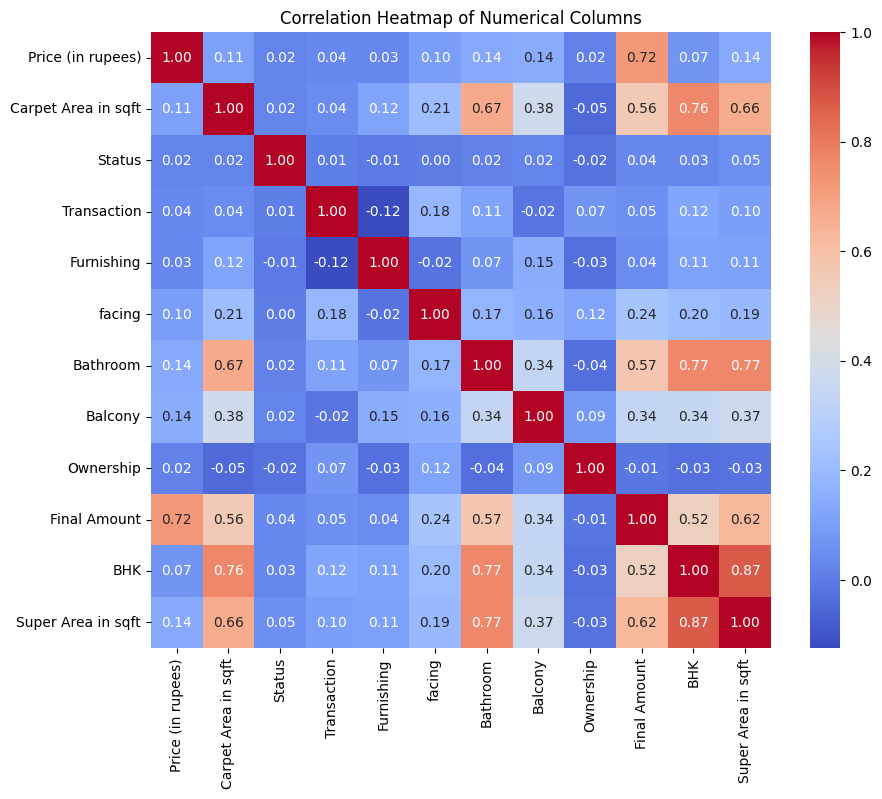

In [213]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141304 entries, 83826 to 91451
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Price (in rupees)    141304 non-null  float64
 1   location             141304 non-null  object 
 2   Carpet Area in sqft  141304 non-null  float64
 3   Status               141304 non-null  int64  
 4   Transaction          141304 non-null  float64
 5   Furnishing           141304 non-null  float64
 6   facing               141304 non-null  int64  
 7   Bathroom             141304 non-null  int64  
 8   Balcony              141304 non-null  float64
 9   Ownership            141304 non-null  float64
 10  Final Amount         141304 non-null  float64
 11  BHK                  141304 non-null  float64
 12  Super Area in sqft   141304 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 15.1+ MB
